In [160]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef,f1_score,make_scorer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import sklearn

In [161]:
df = pd.read_csv('train.csv',index_col = 'Loan_ID')
df
#Col = df.loc[df['country'].isin(['Colombia'])]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [162]:
#Revisar que no existan valores incorrectos
for col in df.columns:
    print(col)
    print(df[col].value_counts(),'\n')

Gender
Male      489
Female    112
Name: Gender, dtype: int64 

Married
Yes    398
No     213
Name: Married, dtype: int64 

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64 

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 

Loan_Amount_Term
360.0    512
180.0     44
480.

In [163]:
print('Valores NaN')
df.isna().sum().sort_values(ascending=False) #Ordenar de forma descendente

Valores NaN


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocesamiento

In [164]:
x = df.isna().sum().sort_values(ascending=False)
x = x.loc[x>0].index
print(x)

Index(['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents',
       'Loan_Amount_Term', 'Gender', 'Married'],
      dtype='object')


In [165]:
df['LoanAmount'] = df['LoanAmount'].fillna(int(df['LoanAmount'].dropna().mean()))
for col in x:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0]) 
df.isna().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

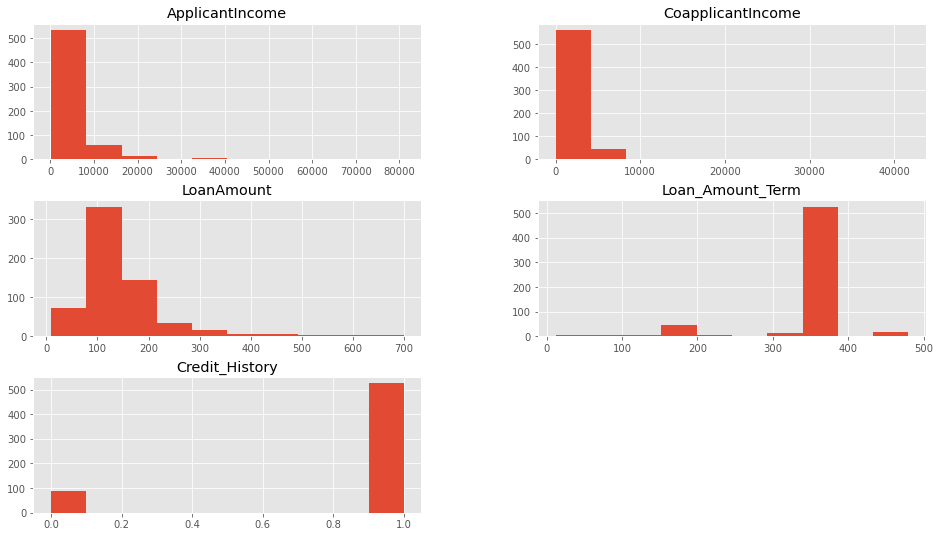

In [166]:
df.hist()
plt.show()

[Text(0.5, 1.0, 'Distribución de creditos por genero')]

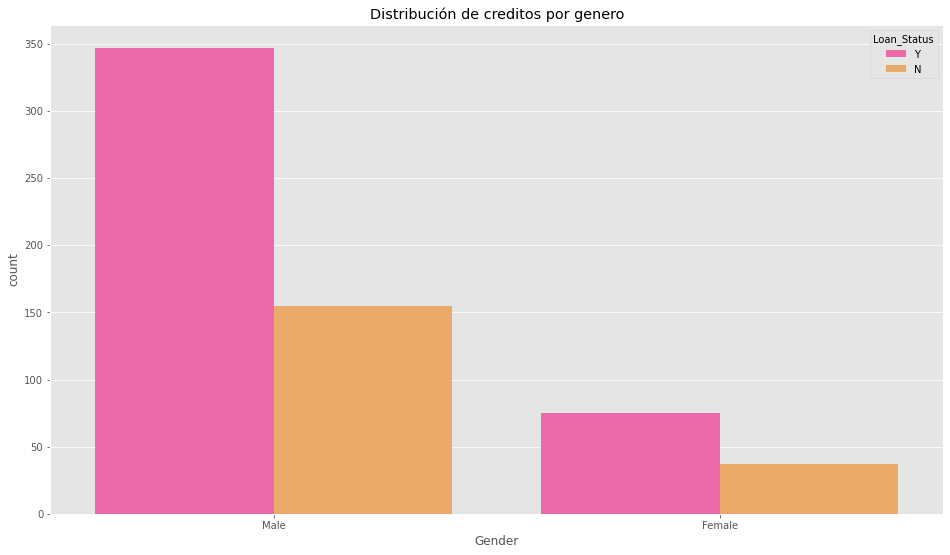

In [167]:
sns.countplot(x = df['Gender'],hue=df['Loan_Status'],palette='spring').set(title='Distribución de creditos por genero')

[Text(0.5, 1.0, 'Distribución de creditos según historial crediticio')]

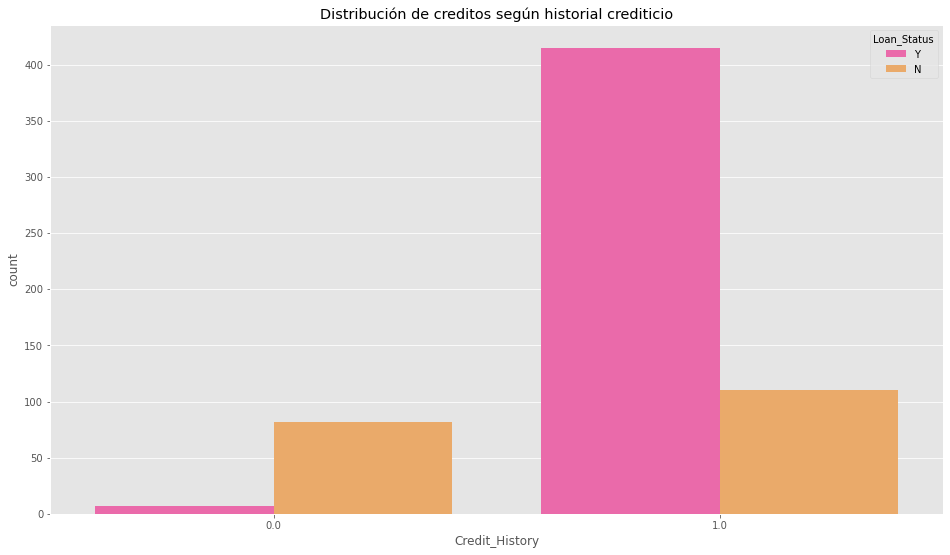

In [168]:
sns.countplot(x = df['Credit_History'],hue=df['Loan_Status'],palette='spring').set(title='Distribución de creditos según historial crediticio')

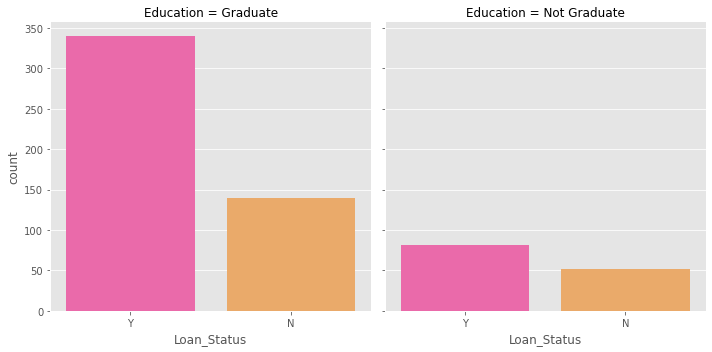

In [169]:
sns.catplot(x = 'Loan_Status',palette='spring',col='Education',data = df,kind="count")

In [170]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
#df['Dependents'] = pd.to_numeric(df.Dependents)
#df

In [171]:
df = pd.get_dummies(df,drop_first=True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
Loan_ID,,,,,,,,,,,,,,
LP001002,1,0,1,0,5849,0.0,146.0,360.0,1.0,2,1,0,0,0
LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,2,1,0,0,0
LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0,0,0
LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,0,0,0
LP002979,1,1,1,0,4106,0.0,40.0,180.0,1.0,0,1,0,0,1
LP002983,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,1,0,0


In [172]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
Gender,1.00,0.36,-0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,-0.03,0.02,-0.00,0.13,0.10
Married,0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09,0.11,0.25,0.13
Education,-0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.07,0.07,0.07,0.09,0.01,-0.02,-0.06
Self_Employed,-0.00,0.00,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00,0.08,0.03,0.00
ApplicantIncome,0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00,0.04,-0.03,0.16
CoapplicantIncome,0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,-0.03,0.01,0.04
LoanAmount,0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,-0.04,0.06,0.02,0.15
Loan_Amount_Term,-0.07,-0.10,0.07,-0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.09,-0.01,-0.08
Credit_History,0.01,0.01,0.07,-0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,0.01,0.01,-0.06
Property_Area,-0.03,0.00,0.07,-0.03,-0.01,0.01,-0.04,-0.08,0.00,1.00,0.03,0.09,0.01,-0.05


## Normalización

In [173]:
y = df['Loan_Status'].values
x = df.drop(labels = 'Loan_Status',axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.1)

In [174]:
scaler = StandardScaler()
scaler.fit(x_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## PCA

In [175]:
#pca = PCA(n_components=2,svd_solver = 'full',random_state = 10)
pca = PCA(svd_solver = 'full',random_state = 0)
pca.fit(x_train)
x_pca = pca.transform(x_train)
pca.n_components_
x_pca

array([[-0.21553731, -0.60856824, -0.58730928, ..., -0.14522094,
        -0.69315526,  0.12597408],
       [-1.67878333, -0.16198865, -1.1018793 , ..., -1.10028523,
         0.34716944,  0.48224305],
       [ 0.20092018, -0.84176487,  1.53600454, ..., -0.43023974,
        -0.93535808, -0.29765608],
       ...,
       [ 0.16703891, -0.55928095,  1.1176756 , ...,  0.3373857 ,
         0.29329046,  0.04218362],
       [-1.8512887 ,  1.76320083, -1.11246291, ...,  0.77624424,
        -0.05412578,  0.04942143],
       [-0.47814836,  0.54511303, -0.98005577, ..., -1.09026838,
         0.47282369, -0.07591027]])

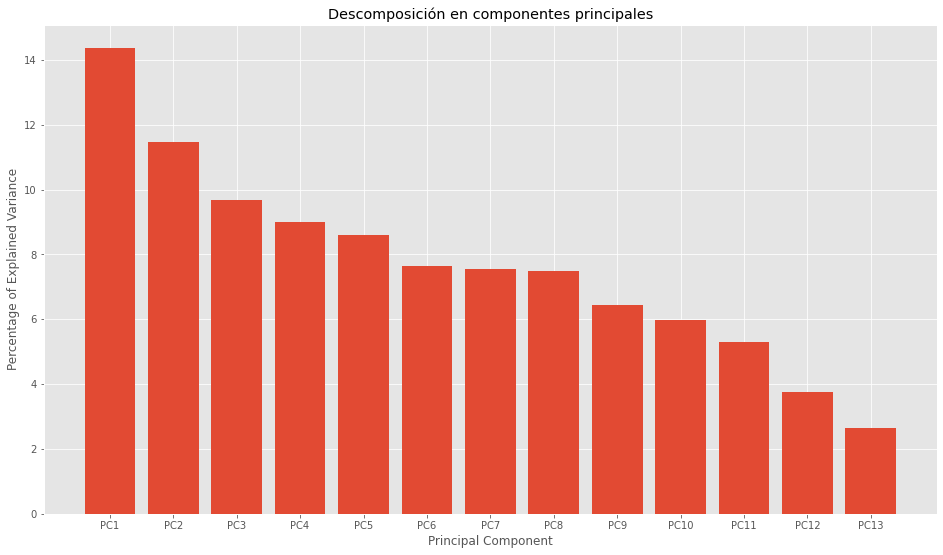

Varianza explicada: 
 [14.37 11.47  9.68  9.01  8.61  7.63  7.56  7.5   6.45  5.97  5.31  3.77
  2.66]


In [176]:
#Porcentaje de variación para cada componente principal
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Descomposición en componentes principales')
plt.show()

print("Varianza explicada: \n",per_var)

## Clasificación KNN

In [177]:
scoring = {"F1": "f1", "MCC": make_scorer(matthews_corrcoef)}
#MCC = make_scorer(matthews_corrcoef)

In [178]:
parameters = [{'n_neighbors': range(1,21,1),
              'metric': ['manhattan','euclidean', 'chebyshev'],
               'p': range(1,4,1),
               'weights': ['uniform','distance']
                }]


grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = scoring,
                           refit='MCC',
                           cv = 5,
                           n_jobs = 1)
grid_search.fit(x_pca, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Mejor MCC: {:.2f}".format(best_accuracy))
print("Parametros MCC:", best_parameters,'\n')
print("Mejor F1: {:.2f}".format(np.amax(grid_search.cv_results_['mean_test_F1'])))
print("Parametros F1",grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_F1'])])

Mejor MCC: 0.54
Parametros MCC: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'} 

Mejor F1: 0.88
Parametros F1 {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


## SVM

In [179]:
parameters = [{'kernel': ['linear','poly','rbf','sigmoid'],
              'degree': [2,3],
               'coef0': np.arange(0,1.2,0.2),
               'C': np.arange(0.2,1.2,0.2),
               'gamma': ['scale','auto']
                }]

grid_search = GridSearchCV(estimator = svm.SVC(random_state=0),
                           param_grid = parameters,
                           scoring = scoring,
                           refit='MCC',
                           cv = 5,
                           n_jobs = 1)
grid_search.fit(x_pca, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Mejor MCC: {:.2f}".format(best_accuracy))
print("Parametros MCC:", best_parameters,'\n')
print("Mejor F1: {:.2f}".format(np.amax(grid_search.cv_results_['mean_test_F1'])))
print("Parametros F1",grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_F1'])])

Mejor MCC: 0.55
Parametros MCC: {'C': 0.6000000000000001, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'} 

Mejor F1: 0.88
Parametros F1 {'C': 0.6000000000000001, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


## Regresión Logistica

In [180]:
import warnings
warnings.filterwarnings("ignore")

parameters = [{'solver': ['sag','saga','lbfgs', 'newton-cg', 'liblinear'],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'C': np.arange(0,2,0.2)
                }]
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter=500),
                           param_grid = parameters,
                           scoring = scoring,
                           refit='MCC',
                           cv = 5,
                           n_jobs = -1)


grid_search.fit(x_pca, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Mejor MCC: {:.2f}".format(best_accuracy))
print("Parametros MCC:", best_parameters,'\n')
print("Mejor F1: {:.2f}".format(np.nanmax(grid_search.cv_results_['mean_test_F1'])))
print("Parametros F1",grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_F1'])])

Mejor MCC: 0.56
Parametros MCC: {'C': 0.0, 'penalty': 'none', 'solver': 'sag'} 

Mejor F1: 0.88
Parametros F1 {'C': 0.0, 'penalty': 'none', 'solver': 'sag'}


## Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [1, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid,scoring=scoring,refit='MCC',n_jobs=-1)
grid_search.fit(x_pca, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Mejor MCC: {:.2f}".format(best_accuracy))
print("Best Parameters:", best_parameters)
print("Mejor F1: {:.2f}".format(np.amax(grid_search.cv_results_['mean_test_F1'])))
print("Parametros F1",grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_F1'])])

Mejor MCC: 0.55
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
Mejor F1: 0.88
Parametros F1 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}


## Validación Regresión logistica

In [182]:
clf = LogisticRegression(max_iter=500,C= 0.0,penalty='none', solver='sag')
clf.fit(x_pca, y_train)
x_testpca = pca.transform(x_test)
y_predict = clf.predict(x_testpca)
score2 = matthews_corrcoef(y_test,y_predict)
score3 = f1_score(y_test,y_predict)
print("MCC: {:.2f}".format(score2))
print("F1 : {:.2f}".format(score3))

MCC: 0.39
F1 : 0.86


## Validación Random Forest

In [183]:
clf = RandomForestClassifier(criterion='entropy',max_depth=6,max_features='auto', n_estimators=500)
clf.fit(x_pca, y_train)
x_testpca = pca.transform(x_test)
y_predict = clf.predict(x_testpca)
score2 = matthews_corrcoef(y_test,y_predict)
score3 = f1_score(y_test,y_predict)
print("MCC: {:.2f}".format(score2))
print("F1 : {:.2f}".format(score3))

MCC: 0.39
F1 : 0.86


## Prueba conjunto test

In [184]:
df1 = pd.read_csv('test.csv',index_col = 'Loan_ID')
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban


In [185]:
df1.isna().sum().sort_values(ascending=False) #Ordenar de forma descendente

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [186]:
x = df1.isna().sum().sort_values(ascending=False)
x = x.loc[x>0].index
df1['LoanAmount'] = df1['LoanAmount'].fillna(int(df1['LoanAmount'].dropna().mean()))
for col in x:
    df1[col] = df1[col].fillna(df1[col].dropna().mode().values[0]) 
df1.isna().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [187]:
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Self_Employed']=df1['Self_Employed'].map({'Yes':1,'No':0})
df1['Property_Area']=df1['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})


In [188]:
df1 = pd.get_dummies(df1,drop_first=True)
df1


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,1,0,5720,0,110.0,360.0,1.0,2,0,0,0
LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1,0,0
LP001031,1,1,1,0,5000,1800,208.0,360.0,1.0,2,0,1,0
LP001035,1,1,1,0,2340,2546,100.0,360.0,1.0,2,0,1,0
LP001051,1,0,0,0,3276,0,78.0,360.0,1.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,0,1,4009,1777,113.0,360.0,1.0,2,0,0,1
LP002975,1,1,1,0,4158,709,115.0,360.0,1.0,2,0,0,0
LP002980,1,0,1,0,3250,1993,126.0,360.0,1.0,1,0,0,0


In [189]:
x1 = df1.values
x1_test = scaler.transform(x1)
x1_pca = pca.transform(x1_test)

In [197]:
y1_predict = clf.predict(x1_pca)

In [198]:
Id = pd.read_csv('test.csv',usecols=['Loan_ID'])
predict = pd.DataFrame(y1_predict)
result=pd.concat([Id, predict], axis=1)
result.columns=['Loan_ID', 'Loan_Status']

In [199]:
result.head(-5)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
357,LP002952,1
358,LP002954,1
359,LP002962,1
360,LP002965,1


In [203]:
result['Loan_Status']=result['Loan_Status'].map({1:'Y',0:'N'})
result.to_csv('prediction.csv', index=False)

In [205]:
result['Loan_Status'].value_counts()

Y    304
N     63
Name: Loan_Status, dtype: int64